In [2]:
#Main
import pandas as pd
import numpy as np
from math import floor
import time
import pickle
from tqdm import tqdm
from collections import defaultdict# import warnings filter
from pandas.tseries.offsets import DateOffset

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [4]:
import seaborn as sns

In [5]:
HEL = "No_Disease"

In [6]:
data4_Y = pd.read_csv(f'/Users/marinacamacho/Desktop/Master_I/Modelling/Alluvia_data4{HEL}.csv')
data4_Y = data4_Y.set_index('eid')

In [7]:
cd /Users/marinacamacho/Desktop/Master_I/CLUSTERING_PLOTS

/Users/marinacamacho/Desktop/Master_I/CLUSTERING_PLOTS


In [8]:
data_clu = data4_Y.copy()

In [9]:
del data_clu['CVD']
del data_clu['Depression']
del data_clu['Diabetes']
del data_clu['visit0']
del data_clu['visit1']
del data_clu['Age']
del data_clu['Time0']
del data_clu['Time1']
del data_clu['Time2']

In [10]:
max_age = int(data_clu[['Age_at_CVD', 'Age_at_Depression', 'Age_at_Diabetes']].max().max())
data_clu.fillna(max_age + 1, inplace=True)

In [11]:
# Determine the optimal number of clusters using Elbow Method
wcss = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_clu)
    wcss.append(kmeans.inertia_)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/clust

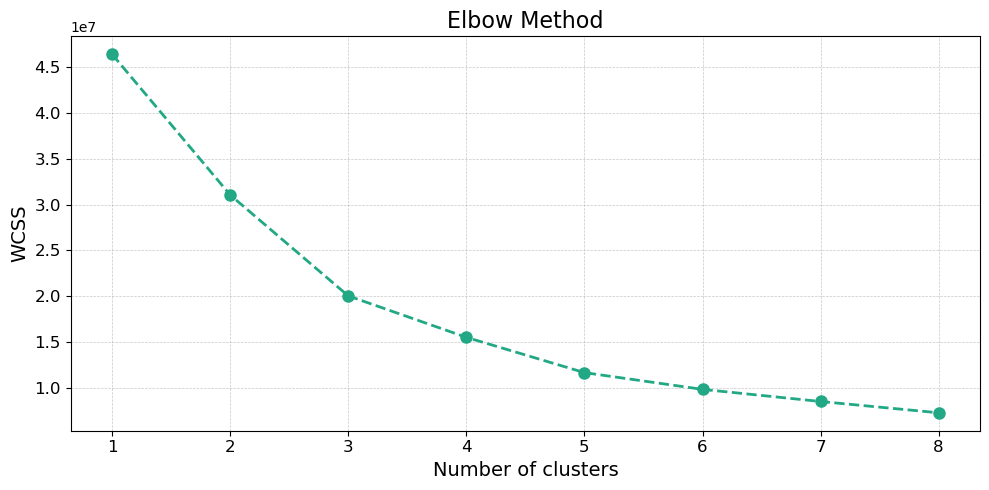

In [37]:
plt.figure(figsize=(10,5))

# Use viridis color for the line plot
color = plt.cm.viridis(0.6)
plt.plot(range(1, 9), wcss, marker='o', linestyle='--', color=color, linewidth=2, markersize=8)

# Adding a grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Labels, title and show
plt.title('Elbow Method', fontsize=16)
plt.xlabel('Number of clusters', fontsize=14)
plt.ylabel('WCSS', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.savefig(f"elbow_k.png", dpi=300)
plt.show()

In [ ]:
# Silhouette Score
silhouette_scores = []
for i in range(2, 9):  # Silhouette score is defined for 2 clusters or more
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_clu)
    silhouette_scores.append(silhouette_score(data_clu, kmeans.labels_))

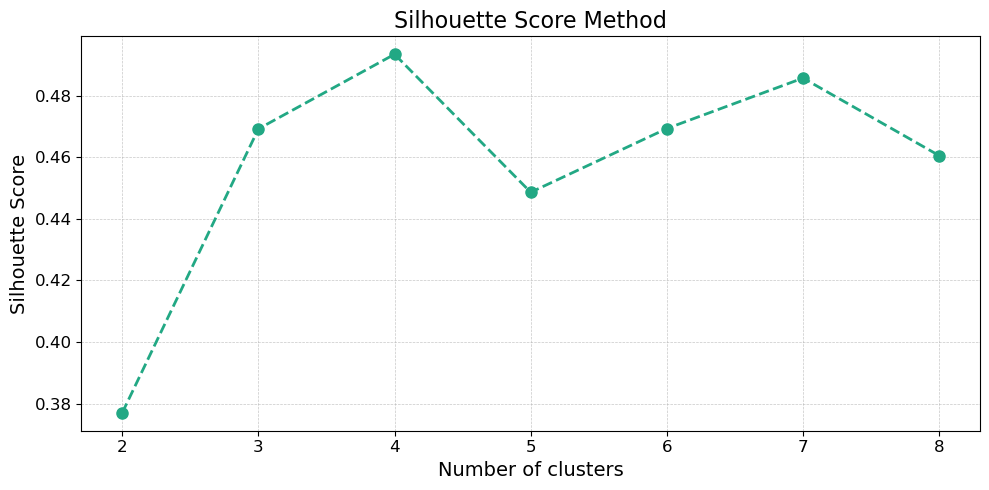

In [36]:
plt.figure(figsize=(10,5))

# Use viridis color for the line plot
color = plt.cm.viridis(0.6)
plt.plot(range(2, 9), silhouette_scores, marker='o', linestyle='--', color=color, linewidth=2, markersize=8)

# Adding a grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Labels, title and show
plt.title('Silhouette Score Method', fontsize=16)
plt.xlabel('Number of clusters', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.savefig(f"silhouette_k.png", dpi=300)
plt.show()

In [24]:
# Davies-Bouldin Index
db_scores = []
for i in range(2, 9):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_clu)
    db_scores.append(davies_bouldin_score(data_clu, kmeans.labels_))

# Finding the number of clusters with the minimum Davies-Bouldin Index
optimal_clusters_db = db_scores.index(min(db_scores)) + 2
print(f"Optimal number of clusters (Davies-Bouldin Index): {optimal_clusters_db}")

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/clust

Optimal number of clusters (Davies-Bouldin Index): 5


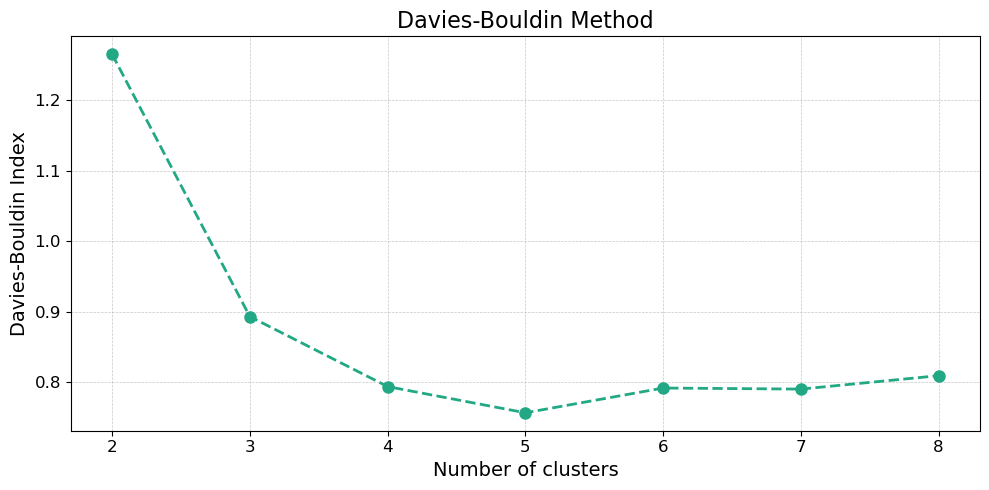

In [35]:
plt.figure(figsize=(10,5))

# Use viridis color for the line plot
color = plt.cm.viridis(0.6)
plt.plot(range(2, 9), db_scores, marker='o', linestyle='--', color=color, linewidth=2, markersize=8)

# Adding a grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Labels, title and show
plt.title('Davies-Bouldin Method', fontsize=16)
plt.xlabel('Number of clusters', fontsize=14)
plt.ylabel('Davies-Bouldin Index', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.savefig(f"david_k.png", dpi=300)
plt.show()

In [28]:
# Calinski-Harabasz Index
ch_scores = []
for i in range(2, 9):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_clu)
    ch_scores.append(calinski_harabasz_score(data_clu, kmeans.labels_))

# Finding the number of clusters with the maximum Calinski-Harabasz Index
optimal_clusters_ch = ch_scores.index(max(ch_scores)) + 2
print(f"Optimal number of clusters (Calinski-Harabasz Index): {optimal_clusters_ch}")

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/clust

Optimal number of clusters (Calinski-Harabasz Index): 8


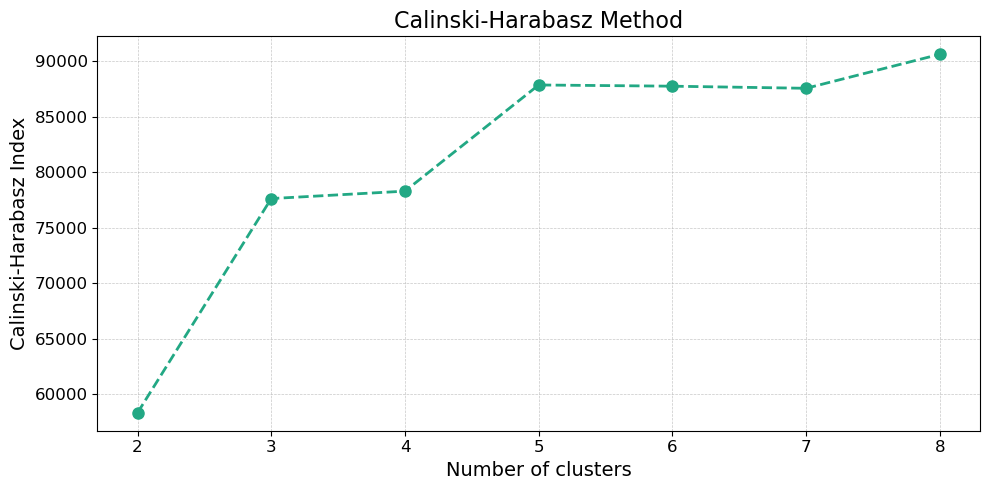

In [34]:
plt.figure(figsize=(10,5))

# Use viridis color for the line plot
color = plt.cm.viridis(0.6)
plt.plot(range(2, 9), ch_scores, marker='o', linestyle='--', color=color, linewidth=2, markersize=8)

# Adding a grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Labels, title and show
plt.title('Calinski-Harabasz Method', fontsize=16)
plt.xlabel('Number of clusters', fontsize=14)
plt.ylabel('Calinski-Harabasz Index', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.savefig(f"calinksi_k.png", dpi=300)
plt.show()

In [12]:
data_clu

,Age_at_CVD,Age_at_Depression,Age_at_Diabetes
eid,,,
1000028,53.128679,84.000000,84.000000
1000087,62.014374,84.000000,62.014374
1000159,84.000000,42.519507,84.000000
1000302,84.000000,84.000000,54.315537
1000430,84.000000,84.000000,52.255989
...,...,...,...
6024702,72.265572,51.553730,84.000000
6024753,84.000000,59.775496,84.000000
6024768,84.000000,56.468857,84.000000


In [33]:
# Choose an optimal number based on the plot and then fit the KMeans model
optimal_clusters = 6  # Just an example, you should choose based on the plot
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(data_clu)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [35]:
average_participant = data_clu.groupby('Cluster').mean()
print(average_participant)

         Age_at_CVD  Age_at_Depression  Age_at_Diabetes
Cluster                                                
0         58.034025          83.815814        83.764035
1         83.496358          82.927010        61.590287
2         57.507263          58.073233        76.776618
3         83.800311          57.591617        82.179220
4         59.686803          82.954618        60.392634
5         74.603440          82.744869        82.766278


In [34]:
data_clu['Cluster'] = clusters
data_clu['Cluster'].value_counts()

5    32948
0    30253
1    22596
3    16700
4    10722
2     4702
Name: Cluster, dtype: int64

In [40]:
average_participant = data_clu.groupby('Cluster').mean()
print(average_participant)

         Age_at_CVD  Age_at_Depression  Age_at_Diabetes
Cluster                                                
0         58.034025          83.815814        83.764035
1         83.496358          82.927010        61.590287
2         57.507263          58.073233        76.776618
3         83.800311          57.591617        82.179220
4         59.686803          82.954618        60.392634
5         74.603440          82.744869        82.766278


In [41]:
average_participant = data_clu.groupby('Cluster').std()
print(average_participant)

         Age_at_CVD  Age_at_Depression  Age_at_Diabetes
Cluster                                                
0          6.120197           1.409679         1.478466
1          2.151938           4.636457         8.228466
2          7.539509           7.716849        12.199164
3          1.488626           8.676573         6.939766
4          7.198585           4.142599         7.187749
5          5.748597           3.420508         3.222461


In [42]:
average_participant = data_clu.groupby('Cluster').median()
print(average_participant)

         Age_at_CVD  Age_at_Depression  Age_at_Diabetes
Cluster                                                
0         59.147159          84.000000        84.000000
1         84.000000          84.000000        62.939083
2         58.332991          59.266940        84.000000
3         84.000000          58.075291        84.000000
4         60.479124          84.000000        61.489049
5         73.289528          84.000000        84.000000


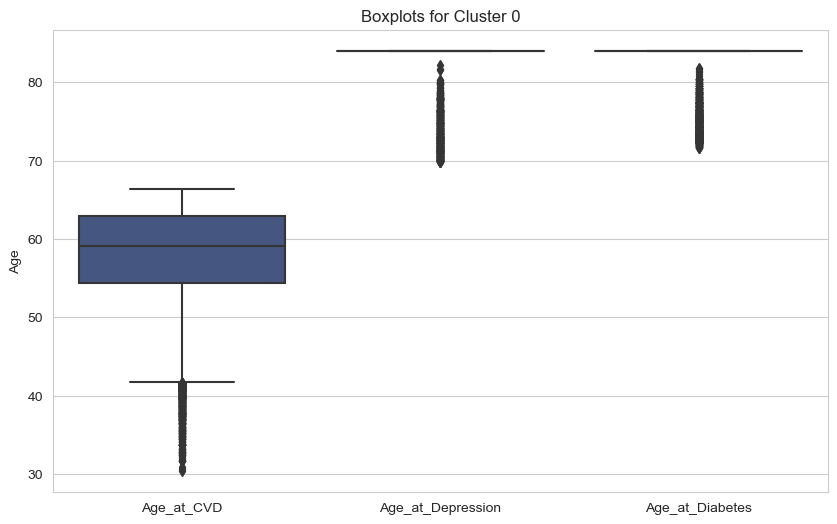

Plot saved as boxplot_cluster_6_0.png


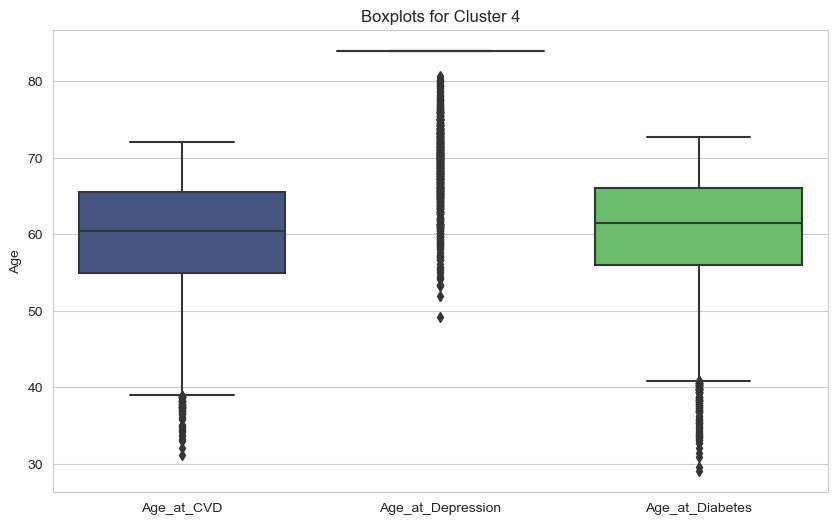

Plot saved as boxplot_cluster_6_4.png


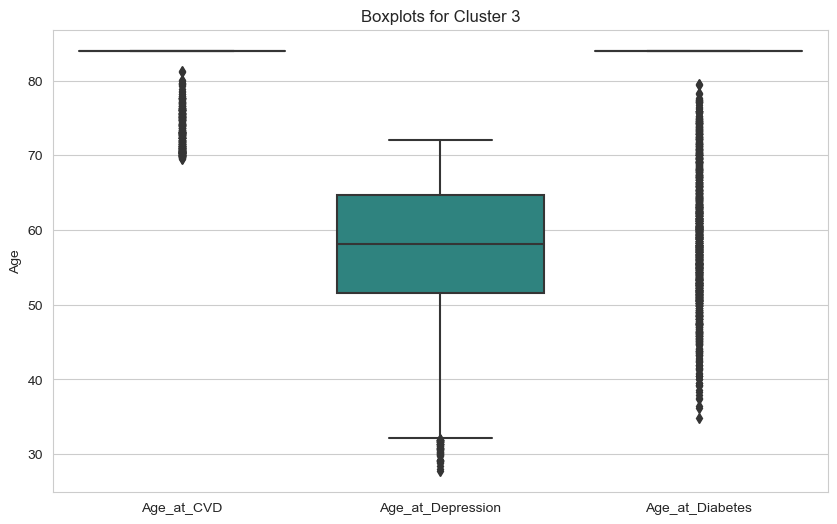

Plot saved as boxplot_cluster_6_3.png


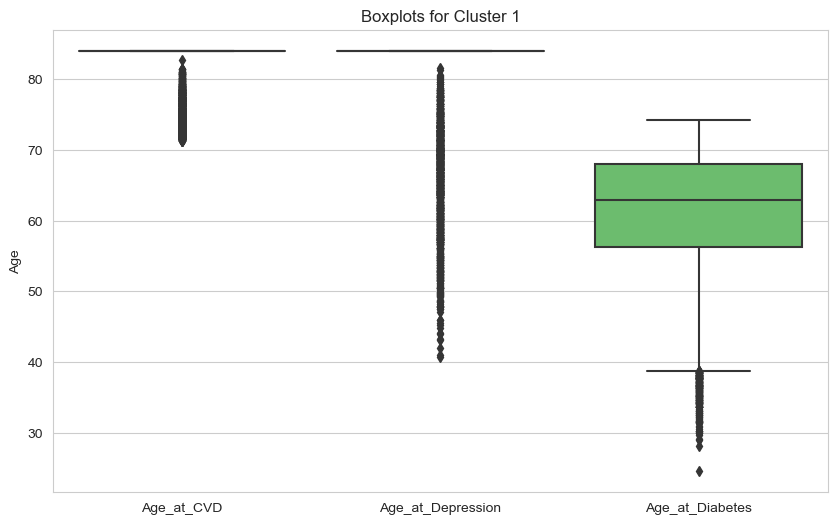

Plot saved as boxplot_cluster_6_1.png


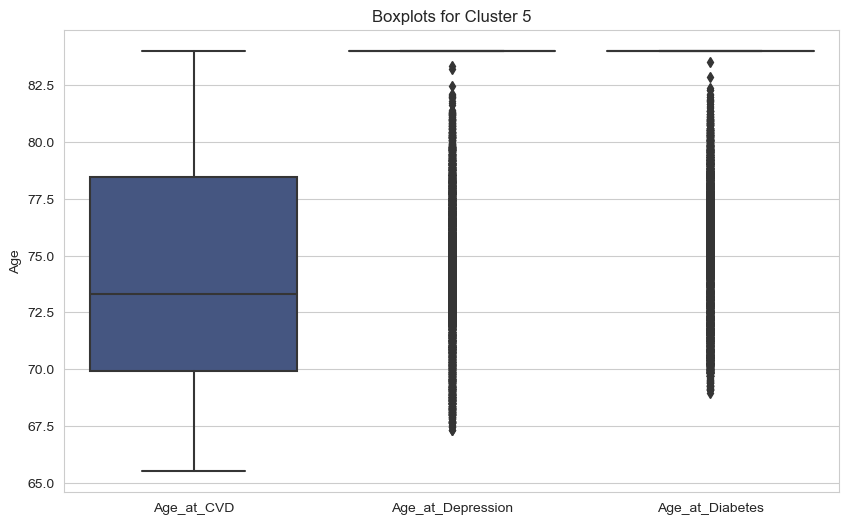

Plot saved as boxplot_cluster_6_5.png


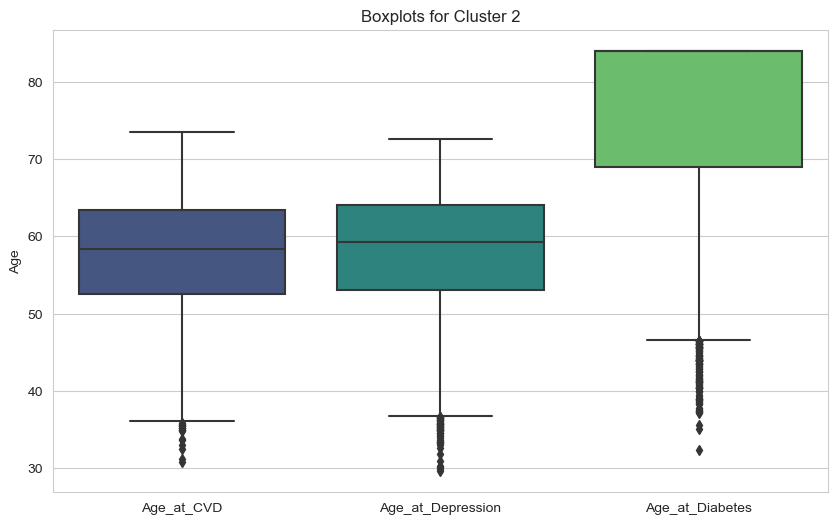

Plot saved as boxplot_cluster_6_2.png


In [53]:
KME = "_6_"
unique_clusters = data_clu['Cluster'].unique()
data_clu.to_csv(f'data_clu{KME}.csv', index=True, header=True)

# Set the plotting style to whitegrid for a grey grid
sns.set_style("whitegrid")

# Create a plot for each cluster
for cluster in unique_clusters:
    subset = data_clu[data_clu['Cluster'] == cluster].drop('Cluster', axis=1)
    
    plt.figure(figsize=(10, 6))
    
    # Use the viridis palette for the boxplot
    sns.boxplot(data=subset, palette="viridis")
    
    plt.title(f'Boxplots for Cluster {cluster}')
    plt.ylabel('Age')
    
    # Save the plot to a file with high DPI
    filename = f'boxplot_cluster{KME}{cluster}.png'
    plt.savefig(filename, bbox_inches='tight', dpi=300)  # dpi set to 300 for high resolution
    
    # Display the plot
    plt.show()
    
    print(f"Plot saved as {filename}")


In [51]:
unique_clusters

array([0, 4, 3, 1, 5, 2], dtype=int32)